In [1]:
import pandas as pd
import numpy as np 
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data Loading 
df_rainfall = pd.read_csv("query002_rainfall.csv")

In [3]:
#shape of the data
df_rainfall.shape

(2192, 13)

In [4]:
df_rainfall

,ID_IAREA,NAME,LATITUDE,LONGITUDE,COUNTRY,id_reg_nat,time,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration,id_area
0,1,BHOPAL,23.254690,77.402890,INDIA,1,2020-11-19,23.3,1.2,14.8,255,2.84,1
1,1,BHOPAL,23.254690,77.402890,INDIA,2,2020-11-20,21.2,0.0,12.5,29,3.39,1
2,1,BHOPAL,23.254690,77.402890,INDIA,3,2020-11-21,18.4,0.0,10.2,45,3.64,1
3,1,BHOPAL,23.254690,77.402890,INDIA,4,2020-11-22,18.3,0.0,10.0,72,3.63,1
4,1,BHOPAL,23.254690,77.402890,INDIA,5,2020-11-23,20.1,0.0,11.2,87,3.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2,ALGIERS,36.737232,3.086472,ALGERIA,2189,2023-11-15,17.5,0.0,10.2,293,2.20,2
2188,2,ALGIERS,36.737232,3.086472,ALGERIA,2190,2023-11-16,16.8,0.0,12.7,267,2.27,2
2189,2,ALGIERS,36.737232,3.086472,ALGERIA,2191,2023-11-17,16.5,0.0,10.5,281,2.17,2
2190,2,ALGIERS,36.737232,3.086472,ALGERIA,2192,2023-11-18,16.3,0.0,14.8,56,1.84,2


In [5]:
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID_IAREA                     2192 non-null   int64  
 1   NAME                         2192 non-null   object 
 2   LATITUDE                     2192 non-null   float64
 3   LONGITUDE                    2192 non-null   float64
 4   COUNTRY                      2192 non-null   object 
 5   id_reg_nat                   2192 non-null   int64  
 6   time                         2192 non-null   object 
 7   temperature_2m_mean          2192 non-null   float64
 8   precipitation_sum            2192 non-null   float64
 9   wind_speed_10m_max           2192 non-null   float64
 10  wind_direction_10m_dominant  2192 non-null   int64  
 11  et0_fao_evapotranspiration   2192 non-null   float64
 12  id_area                      2192 non-null   int64  
dtypes: float64(6), int

# Data Wrangling

In [6]:
# Exclude the 'id_area' Column (we noticed that it's duplicatedcolumn) 
df_rainfall= df_rainfall.loc[:,df_rainfall.columns != 'id_area']

In [7]:
df_rainfall= df_rainfall.rename(columns=str.lower)

In [8]:
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_iarea                     2192 non-null   int64  
 1   name                         2192 non-null   object 
 2   latitude                     2192 non-null   float64
 3   longitude                    2192 non-null   float64
 4   country                      2192 non-null   object 
 5   id_reg_nat                   2192 non-null   int64  
 6   time                         2192 non-null   object 
 7   temperature_2m_mean          2192 non-null   float64
 8   precipitation_sum            2192 non-null   float64
 9   wind_speed_10m_max           2192 non-null   float64
 10  wind_direction_10m_dominant  2192 non-null   int64  
 11  et0_fao_evapotranspiration   2192 non-null   float64
dtypes: float64(6), int64(3), object(3)
memory usage: 205.6+ KB


### Date IndexTime

In [9]:
df_rainfall['time']= pd.to_datetime(df_rainfall['time'])
df_rainfall = df_rainfall.set_index('time', drop= True)

In [10]:
df_rainfall.head()

,id_iarea,name,latitude,longitude,country,id_reg_nat,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration
time,,,,,,,,,,,
2020-11-19,1,BHOPAL,23.25469,77.40289,INDIA,1,23.3,1.2,14.8,255,2.84
2020-11-20,1,BHOPAL,23.25469,77.40289,INDIA,2,21.2,0.0,12.5,29,3.39
2020-11-21,1,BHOPAL,23.25469,77.40289,INDIA,3,18.4,0.0,10.2,45,3.64
2020-11-22,1,BHOPAL,23.25469,77.40289,INDIA,4,18.3,0.0,10.0,72,3.63
2020-11-23,1,BHOPAL,23.25469,77.40289,INDIA,5,20.1,0.0,11.2,87,3.54


In [11]:
# Exclude the 'id_area' Column (we noticed that it's duplicated column) 
df_rainfall= df_rainfall.loc[:,df_rainfall.columns != 'id_area']

In [12]:
#Numerical Features 
numerical = ["temperature_2m_mean","precipitation_sum",	"wind_speed_10m_max","wind_direction_10m_dominant","et0_fao_evapotranspiration"]

In [13]:
# Check for the missing values
df_rainfall.isna().sum()

id_iarea                       0
name                           0
latitude                       0
longitude                      0
country                        0
id_reg_nat                     0
temperature_2m_mean            0
precipitation_sum              0
wind_speed_10m_max             0
wind_direction_10m_dominant    0
et0_fao_evapotranspiration     0
dtype: int64

In [14]:
df_rainfall.nunique()

id_iarea                          2
name                              2
latitude                          2
longitude                         2
country                           2
id_reg_nat                     2192
temperature_2m_mean             284
precipitation_sum               222
wind_speed_10m_max              277
wind_direction_10m_dominant     331
et0_fao_evapotranspiration      706
dtype: int64

In [15]:
df_rainfall_alg = df_rainfall.loc[df_rainfall["country"]=="ALGERIA"]
df_rainfall_ind = df_rainfall.loc[df_rainfall["country"]=="INDIA"]

# EDA

In [16]:
df_rainfall_alg.describe(exclude = 'object').round(3)

,id_iarea,latitude,longitude,id_reg_nat,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration
count,1096.0,1096.000,1096.000,1096.000,1096.000,1096.000,1096.000,1096.000,1096.000
mean,2.0,36.737,3.086,1645.500,18.336,1.355,19.126,162.762,3.481
std,0.0,0.000,0.000,316.532,5.839,3.872,6.531,117.926,1.559
min,2.0,36.737,3.086,1098.000,5.500,0.000,7.200,1.000,0.570
25%,2.0,36.737,3.086,1371.750,13.300,0.000,14.500,47.000,2.140
50%,2.0,36.737,3.086,1645.500,18.050,0.000,18.000,177.000,3.425
75%,2.0,36.737,3.086,1919.250,23.400,0.600,22.525,269.000,4.750
max,2.0,36.737,3.086,2193.000,37.700,41.700,54.600,360.000,9.090


In [17]:
df_rainfall_ind.describe(exclude = 'object').round(3)

,id_iarea,latitude,longitude,id_reg_nat,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration
count,1096.0,1096.000,1096.000,1096.000,1096.000,1096.00,1096.000,1096.000,1096.000
mean,1.0,23.255,77.403,548.500,24.723,3.97,15.619,187.099,4.737
std,0.0,0.000,0.000,316.532,5.016,12.26,4.745,110.275,2.039
min,1.0,23.255,77.403,1.000,12.300,0.00,6.600,1.000,0.830
25%,1.0,23.255,77.403,274.750,21.275,0.00,12.000,65.000,3.340
50%,1.0,23.255,77.403,548.500,25.100,0.00,14.750,238.500,4.210
75%,1.0,23.255,77.403,822.250,27.600,1.80,18.700,280.000,5.795
max,1.0,23.255,77.403,1096.000,36.400,236.80,42.900,359.000,10.900


### Correlation 

In [18]:
#Correlation matrix between numerical data for Algeria (Algiers)
corr_matrix = df_rainfall_alg[numerical].corr()
df_corr = pd.DataFrame(corr_matrix)
# Display the entire correlation matrix as a table
df_corr

,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration
temperature_2m_mean,1.000000,-0.266204,0.084785,-0.134680,0.842540
precipitation_sum,-0.266204,1.000000,0.201215,0.157584,-0.363490
wind_speed_10m_max,0.084785,0.201215,1.000000,0.099420,0.142001
wind_direction_10m_dominant,-0.134680,0.157584,0.099420,1.000000,-0.153078
et0_fao_evapotranspiration,0.842540,-0.363490,0.142001,-0.153078,1.000000


In [19]:
#Correlation matrix between numerical data for India (Bhopal)
corr_matrix = df_rainfall_ind[numerical].corr()
df_corr = pd.DataFrame(corr_matrix)
# Display the entire correlation matrix as a table
df_corr

,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration
temperature_2m_mean,1.000000,-0.006742,0.458015,0.534856,0.744800
precipitation_sum,-0.006742,1.000000,0.361370,0.141090,-0.354908
wind_speed_10m_max,0.458015,0.361370,1.000000,0.469578,0.273347
wind_direction_10m_dominant,0.534856,0.141090,0.469578,1.000000,0.314318
et0_fao_evapotranspiration,0.744800,-0.354908,0.273347,0.314318,1.000000


### Plotting some data (to check seasonality)

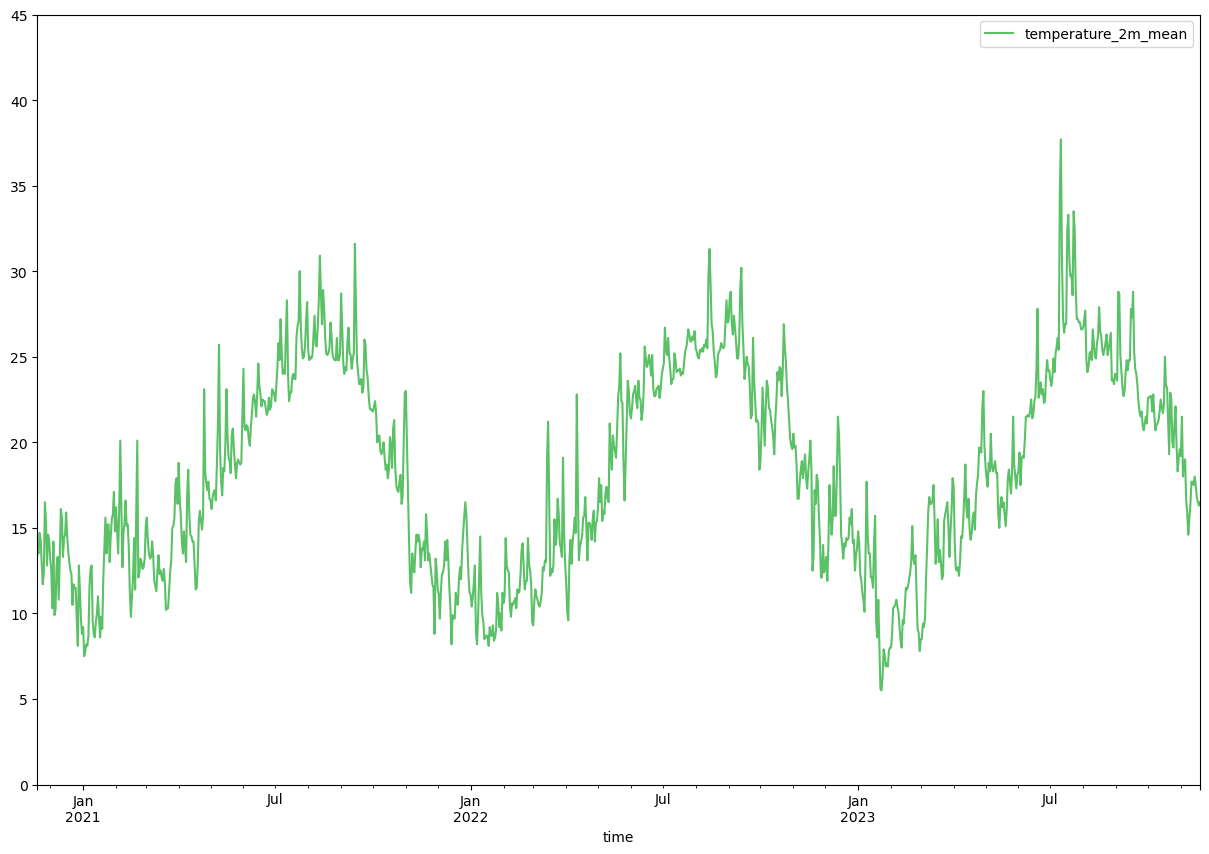

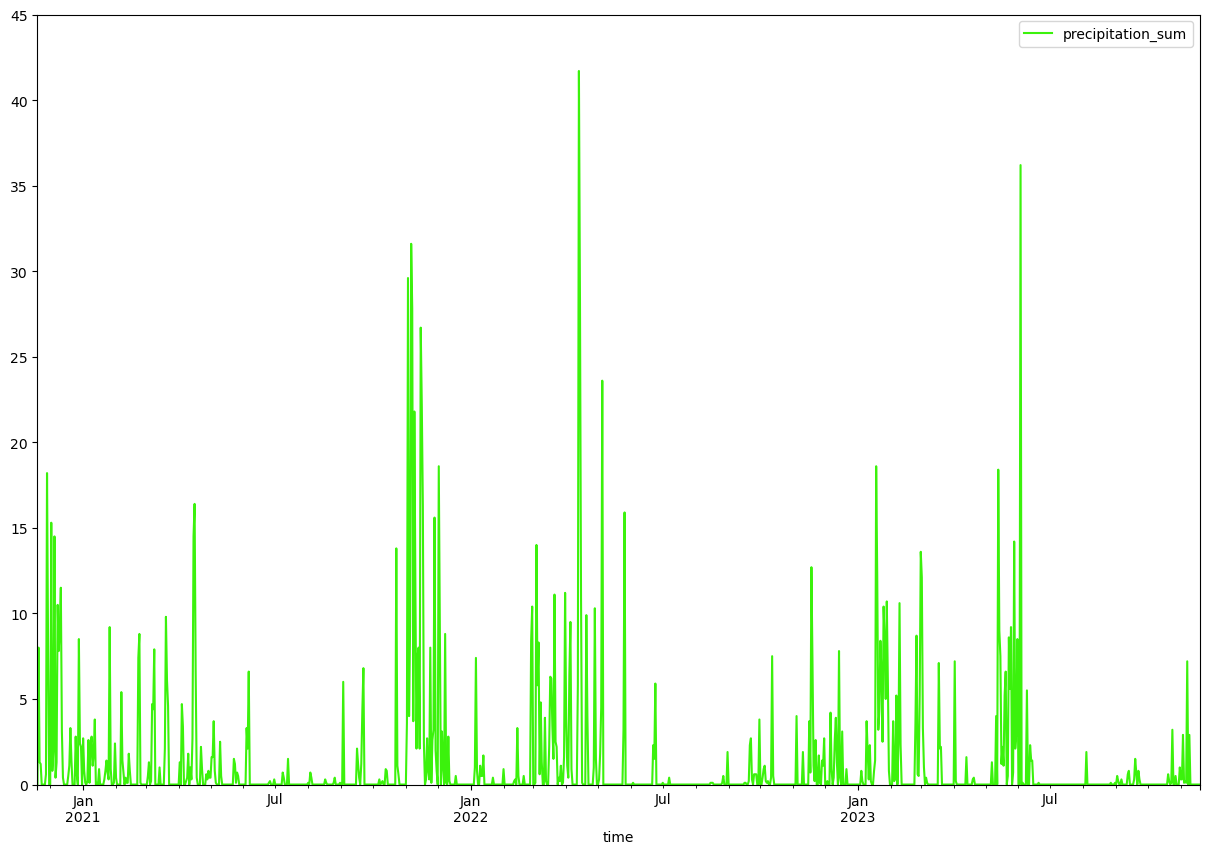

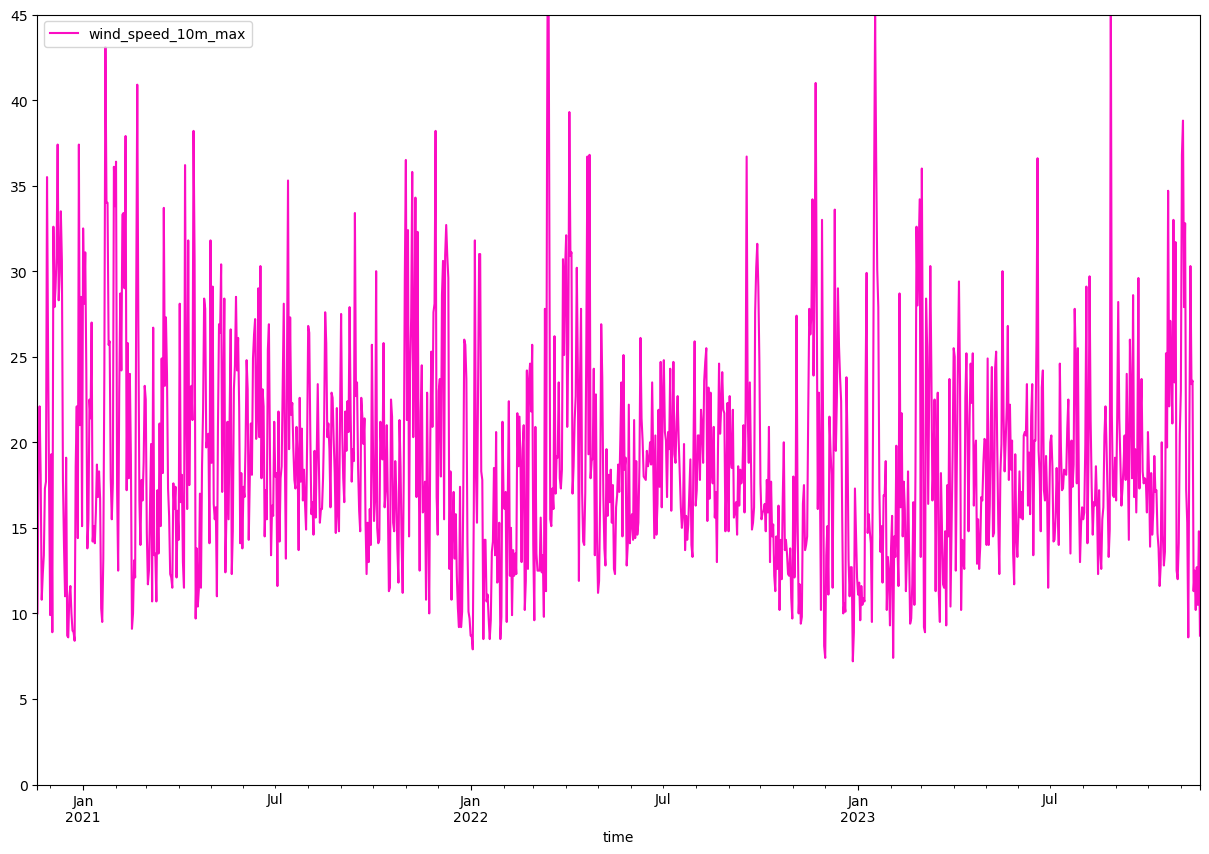

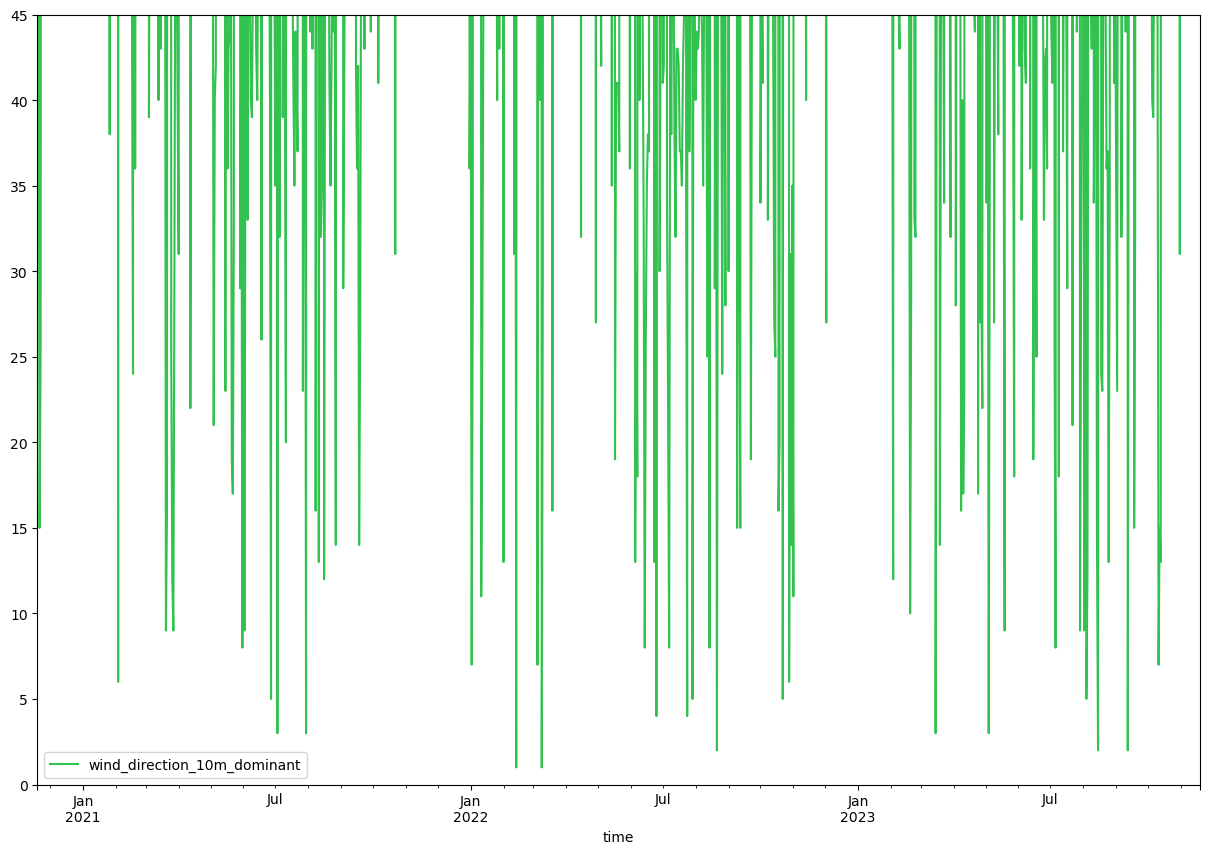

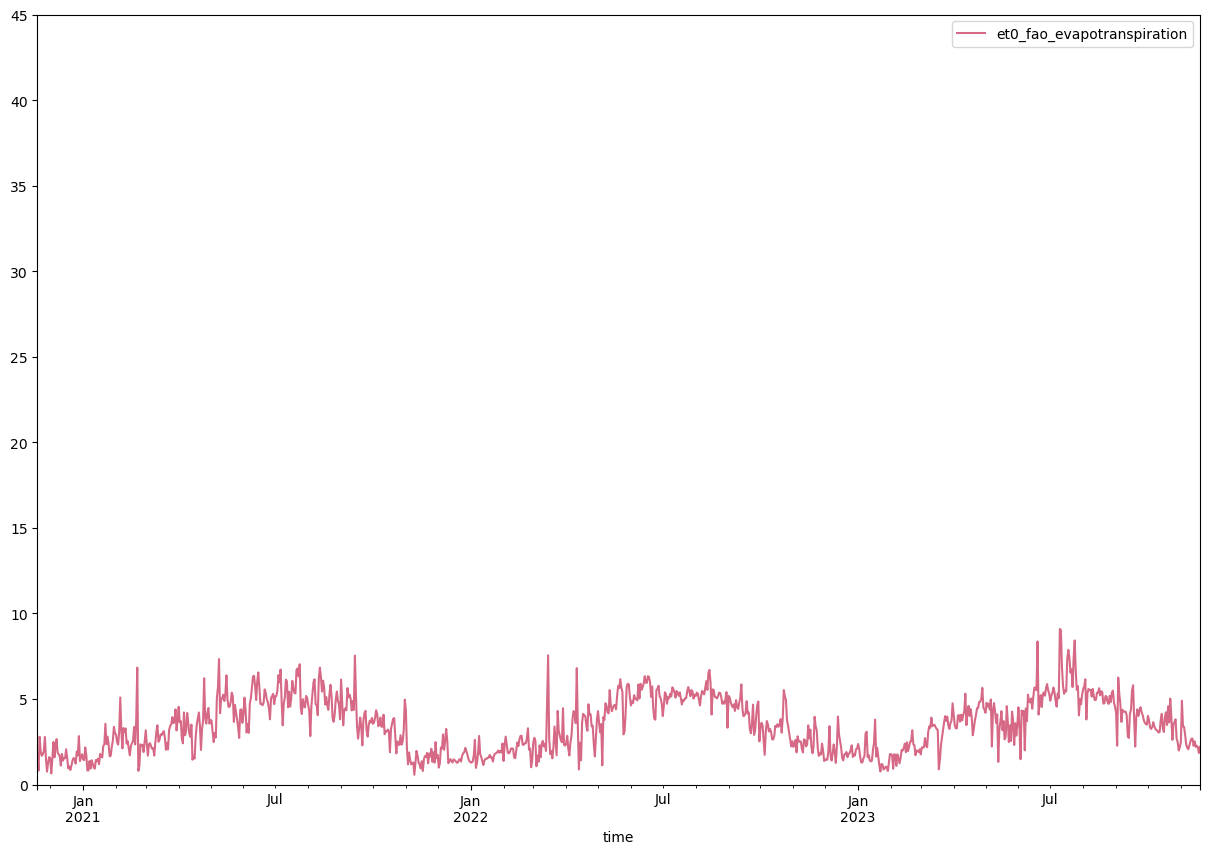

In [20]:
for f in numerical:
    df_rainfall_alg.plot(y =f,figsize=(15,10),ylim=[0,45], c=np.random.rand(3,))

#### To be completed soon...